In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## A. Thu thập dữ liệu

### 1. Lý do lựa chọn tập dữ liệu

### 2. Thông tin về tập dữ liệu
#### 2.1. Chủ đề và nguồn
- Chủ đề: Songs in Spotify and Youtube
- Nguồn: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube
#### 2.2. Giấy phép
- [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
#### 2.3. Phương pháp thu thập
- Source: Spotify, Youtube
- Phương pháp thu thập: APIs
#### 2.4. Thông tin thêm
Bộ dữ liệu các bài hát của nhiều nghệ sĩ khác nhau trên thế giới và với mỗi bài hát:
- Một số thống kê về phiên bản nhạc trên spotify, bao gồm số lượt stream;
- Số lượt xem MV chính thức của bài hát trên youtube.

Nó bao gồm 26 biến cho mỗi bài hát được thu thập từ spotify. Các biến này được mô tả ngắn gọn:
- **Track**: name of the song, as visible on the Spotify platform.
- **Artist**: name of the artist.
- **Url_spotify**: the Url of the song.
- **Album**: the album in wich the song is contained on Spotify.
- **Album_type**: indicates if the song is relesead on Spotify as a single or contained in an album.
- **Uri**: a spotify link used to find the song through the API.
- **Danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Key**: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **Speechiness**: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Instrumentalness**: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Duration_ms**: the duration of the track in milliseconds.
- **Stream**: number of streams of the song on Spotify.
- **Url_youtube**: url of the video linked to the song on Youtube, if it have any.
- **Title**: title of the videoclip on youtube.
- **Channel**: name of the channel that have published the video.
- **Views**: number of views.
- **Likes**: number of likes.
- **Comments**: number of comments.
- **Description**: description of the video on Youtube.
- **Licensed**: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- **official_video**: boolean value that indicates if the video found is the official video of the song.

***

## B. Khám phá dữ liệu

### 1. Đọc dữ liệu, tính số dòng và số cột

In [104]:
#read data
df = pd.read_csv("./archive/Spotify_Youtube.csv")

In [105]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [106]:
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_columns}')

Number of rows: 20718
Number of columns: 28


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là thông tin của một bài hát trên spotify và youtube tương ứng. Có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau, tức không có dòng nào bị 'lạc loài'

Kiểm tra xem có dòng nào bị lặp hay không?

In [107]:
df.duplicated().any()

False

Như vậy, không có dòng nào bị lặp

### 3. Mỗi cột có ý nghĩa gì? 

Ý nghĩa của mỗi cột đã được đề cập ở phần A

### 4. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [108]:
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Các cột đã có kiểu dữ liệu phù hợp để có thể tiếp tục xử lý

Nhận thấy có những cột không cần thiết, ta sẽ tiến hành bỏ đi những cột đó

In [109]:
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [110]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


Kiểm tra tỉ lệ phần trăm giá trị thiếu của mỗi cột

In [111]:
missing_ratio = df.isnull().sum()/num_rows
missing_ratio

Artist              0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Danceability        0.000097
Energy              0.000097
Key                 0.000097
Loudness            0.000097
Speechiness         0.000097
Acousticness        0.000097
Instrumentalness    0.000097
Liveness            0.000097
Valence             0.000097
Tempo               0.000097
Duration_ms         0.000097
Channel             0.022686
Views               0.022686
Likes               0.026113
Comments            0.027464
Licensed            0.022686
official_video      0.022686
Stream              0.027802
dtype: float64

In [112]:
#get numerical columns have missing value
missing_columns = []
for i in df.columns:
    if (df[i].isnull().sum() != 0) and (df[i].dtypes != object):
        missing_columns.append(i)
missing_columns

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Views',
 'Likes',
 'Comments',
 'Stream']

Vẽ biểu đồ phân phối của các cột số bị thiếu dữ liệu

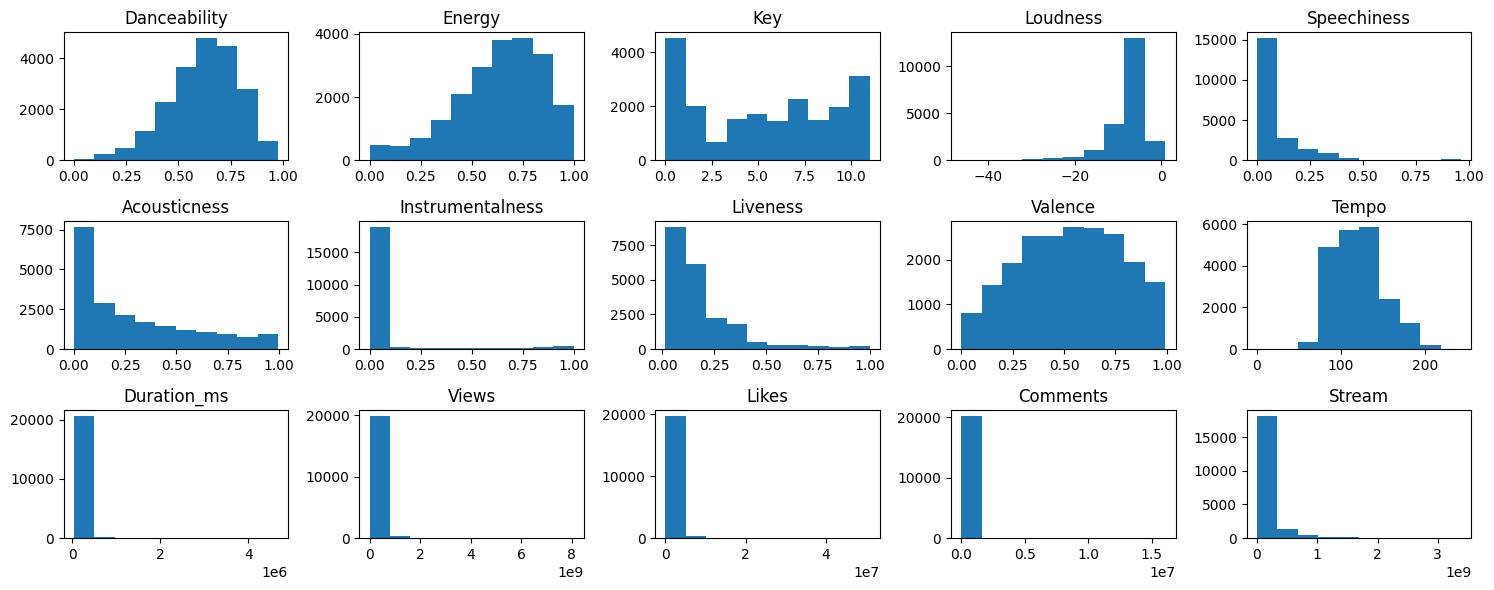

In [113]:
f,a = plt.subplots(3,5,figsize=(15,6))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[missing_columns[idx]])
    ax.set_title(missing_columns[idx])
plt.tight_layout()

Điền giá trị thiếu, cột nào có giá trị `skewness` != 0 thì điền bằng `median`, `skewness` = 0 thì điền bằng `mean`

In [114]:
for col in missing_columns:
    if df[col].skew() != 0:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [115]:
#chuwa oorn
#get categorical columns have missing value
missing_cateforical_columns = []
for i in df.columns:
    if (df[i].isnull().sum() != 0) and (df[i].dtypes == object):
        missing_cateforical_columns.append(i)
for col in missing_cateforical_columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20718 non-null  float64
 5   Energy            20718 non-null  float64
 6   Key               20718 non-null  float64
 7   Loudness          20718 non-null  float64
 8   Speechiness       20718 non-null  float64
 9   Acousticness      20718 non-null  float64
 10  Instrumentalness  20718 non-null  float64
 11  Liveness          20718 non-null  float64
 12  Valence           20718 non-null  float64
 13  Tempo             20718 non-null  float64
 14  Duration_ms       20718 non-null  float64
 15  Channel           20718 non-null  object 
 16  Views             20718 non-null  float6

### 5. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

Với mỗi cột có giá trị số, các giá trị được phân bố

In [117]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,0.619779,0.635253,5.300319,-7.671571,0.096452,0.291526,0.055956,0.193514,0.529854,120.638275,2.247165e+05,9.213575e+07,6.492700e+05,2.685321e+04,1.335440e+08
std,0.165264,0.214137,3.576277,4.632538,0.111956,0.286287,0.193253,0.168524,0.245429,29.577590,1.247846e+05,2.717686e+08,1.767896e+06,1.906038e+05,2.411317e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518250,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094125,0.339000,97.002000,1.800100e+05,1.950563e+06,2.302175e+04,5.420000e+02,1.825666e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740000,0.798000,8.000000,-4.931250,0.103000,0.477000,0.000463,0.237000,0.726000,139.935000,2.524422e+05,6.749228e+07,4.996608e+05,1.372900e+04,1.337912e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09
